In [137]:
import pandas as pd
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


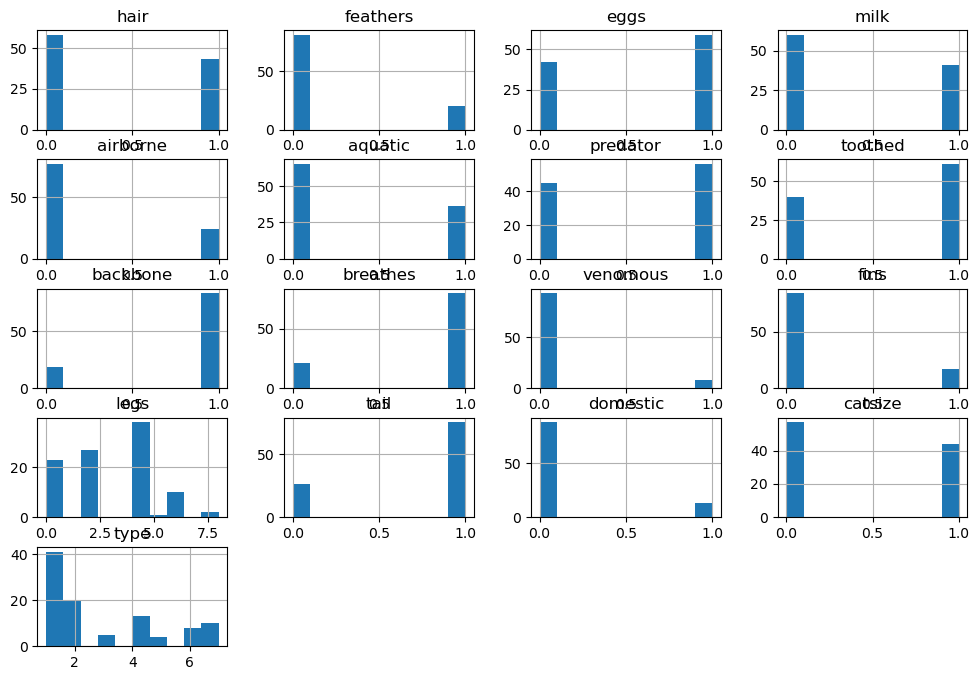

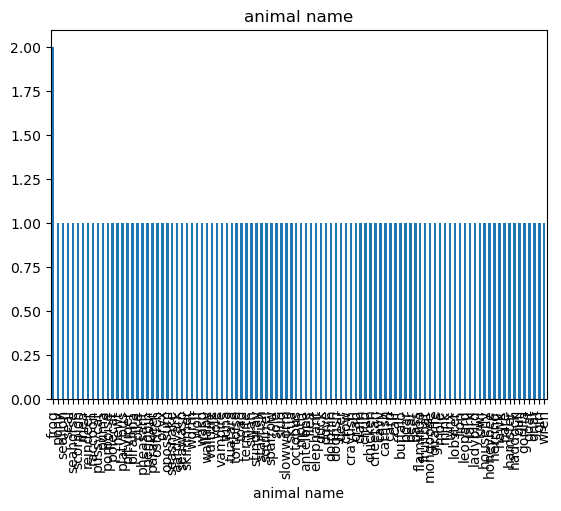

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

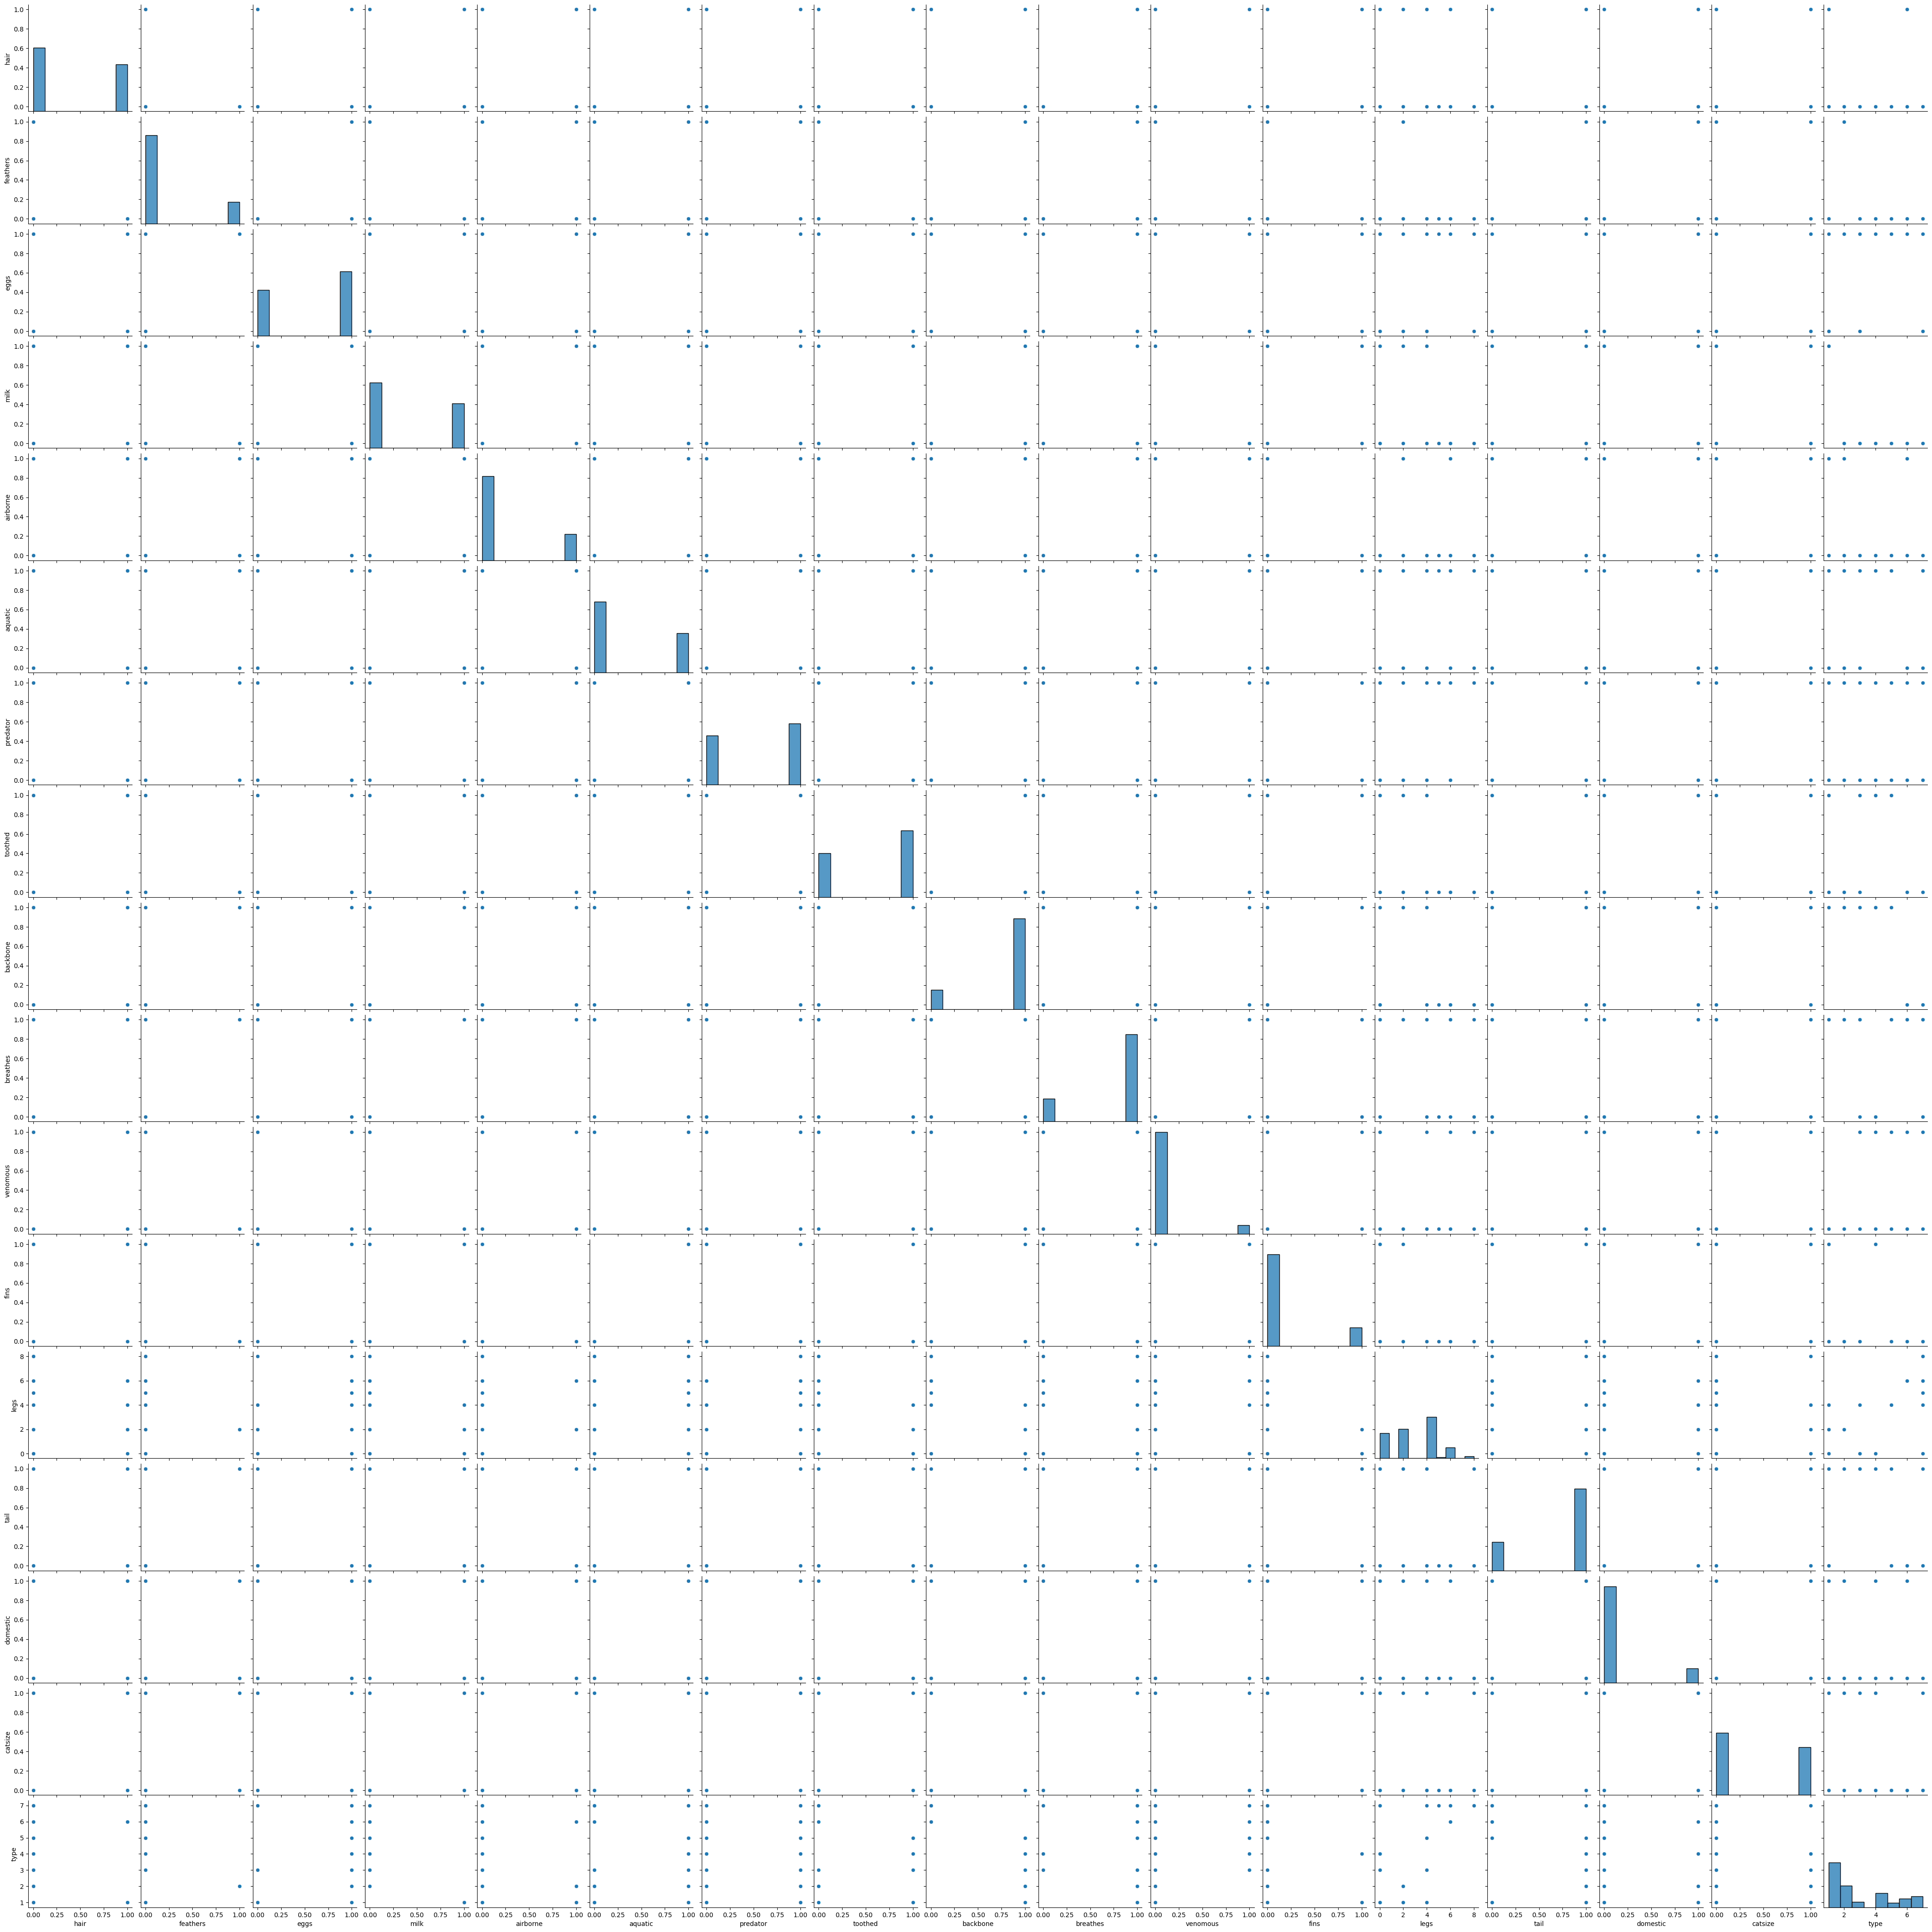

In [3]:
# 1. Analyse the data using the visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
df.hist(figsize=(12, 8))
plt.show()

# Bar plots for categorical features
for col in df.select_dtypes(include='object'):
  plt.figure()
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

# Scatter plots for pairs of numerical features
sns.pairplot(df)
plt.show()

In [138]:
# 2. Preprocess the data by handling missing values & Outliers, if any

# Check for missing values
print(df.isnull().sum())

#There are no Outliers.

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [139]:
# Split the data into X & Y
X = df.iloc[:,1:18]
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [140]:
Y = df['type']
Y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [141]:
# Identify the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape) 

Shape of X: (101, 17)
Shape of Y: (101,)


In [142]:
# 3. Split the dataset into training and testing sets (80% training, 20% testing)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [143]:
# 4. Implement a K-Nearest Neighbors (KNN) Classification model
from sklearn.neighbors import KNeighborsClassifier

# 5. Choose an appropriate distance metric and value for K
# Choosing Euclidean distance and K=5
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model on the training set
model.fit(X_train.values, y_train)

# Make predictions on the testing set
Y_pred_test = model.predict(X_test.values)

In [148]:
# 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, Y_pred_test)
precision = precision_score(y_test, Y_pred_test, average='macro')  # Using 'macro' for multiclass
recall = recall_score(y_test, Y_pred_test, average='macro')
f1 = f1_score(y_test, Y_pred_test, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9047619047619048
Precision: 0.6666666666666666
Recall: 0.7142857142857143
F1-score: 0.6857142857142857


C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 1.9 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 2.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 2.6 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 2.9 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 2.7 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.4 MB 2.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 3.1 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.4 

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


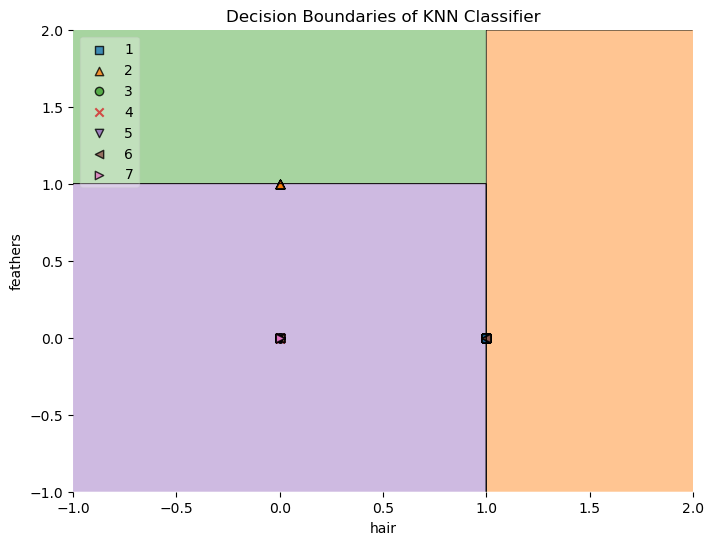

In [145]:
# 7. Visualize the decision boundaries of the classifier

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Assuming 'X' has only two features
X_visual = X.iloc[:, :2]
y_visual = Y

model_visual = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_visual.fit(X_visual, y_visual)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_visual.values, y_visual.values, clf=model_visual, legend=2)
plt.xlabel(X_visual.columns[0])
plt.ylabel(X_visual.columns[1])
plt.title('Decision Boundaries of KNN Classifier')
plt.show() 

In [ ]:
# INTERVIEW QUESTIONS:

# 1. What are the key hyperparameters in KNN?

# K-Nearest Neighbors (KNN) is a simple yet powerful algorithm used for classification and regression tasks. It classifies or predicts the output based on the majority vote or average of the nearest neighbors. The performance of KNN depends on several key hyperparameters:

# 1. Number of Neighbors (k):
# - The number of nearest neighbors to consider when making a prediction.
# - Impact: 
  # - A small k value makes the model sensitive to noise in the training data, potentially leading to overfitting.
  # - A large k value smooths the decision boundary but can lead to underfitting, as the model may overlook local patterns in the data.

# 2. Distance Metric:
# - The metric used to calculate the distance between data points.
# - Common Metrics:
  # - Euclidean Distance: sqrt{sum (x_i - y_i)^2}
  # - Manhattan Distance: sum |x_i - y_i| 
  # - Minkowski Distance: Generalization of Euclidean and Manhattan distances with a parameter p Euclidean is p=2, Manhattan is p=1.
  # - Hamming Distance: Used for categorical variables, measuring the number of differing components.

# 3. Weights:
# - The method of weighting neighbors when making predictions.
  # - Common Options:
  # - Uniform Weights: All neighbors have equal weight in the decision-making process.
  # - Distance Weights: Neighbors closer to the query point have more influence (weights are inversely proportional to distance).

In [ ]:
# 2. What distance metrics can be used in KNN?

# 1. Euclidean Distance:
# - Measures the straight-line distance between two points in the feature space. It’s the most commonly used metric in KNN.

# 2. Manhattan Distance:
# - Measures the distance between two points based on the sum of the absolute differences of their coordinates. Also known as L1 norm.

# 3. Minkowski Distance:
# - Generalizes both Euclidean when p=2 and Manhattan when p=1 distances. The parameter p controls the distance metric.